# Train Test Split

In [1]:
import pandas as pd
from pathlib import Path
DATA_PATH = Path('../data')

In [2]:
weeks = 30
df = pd.read_csv(DATA_PATH/f'train_data_{weeks}_weeks.csv', index_col=0)

In [3]:
y = df.pop('target')
X = df.copy()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [5]:
print(X_train)

     is_premium  weeks_after_artist_created  weeks_after_song_released  \
614           0                          17                          6   
55            1                           8                          8   
540           0                          14                          7   
417           0                          14                         10   
141           1                          11                          5   
..          ...                         ...                        ...   
579           0                          13                         10   
502           0                           8                          7   
537           0                          19                         10   
196           0                          16                          8   
175           0                          15                         13   

     unique_listeners  total_streams  perc_of_subscribed_listeners  \
614                20             34     

# Standarization

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# ML Model Architecture

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Training and Testing ML Model

In [8]:
model.fit(X_train, y_train)

LinearRegression()

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) on train and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R-squared (R2) on train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"RMSE on train set: {rmse_train:.2f}")
print(f"RMSE on test set: {rmse_test:.2f}")

print(f"R-squared on train set: {r2_train:.2f}")
print(f"R-squared on test set: {r2_test:.2f}")



RMSE on train set: 7.22
RMSE on test set: 8.22
R-squared on train set: 0.98
R-squared on test set: 0.98


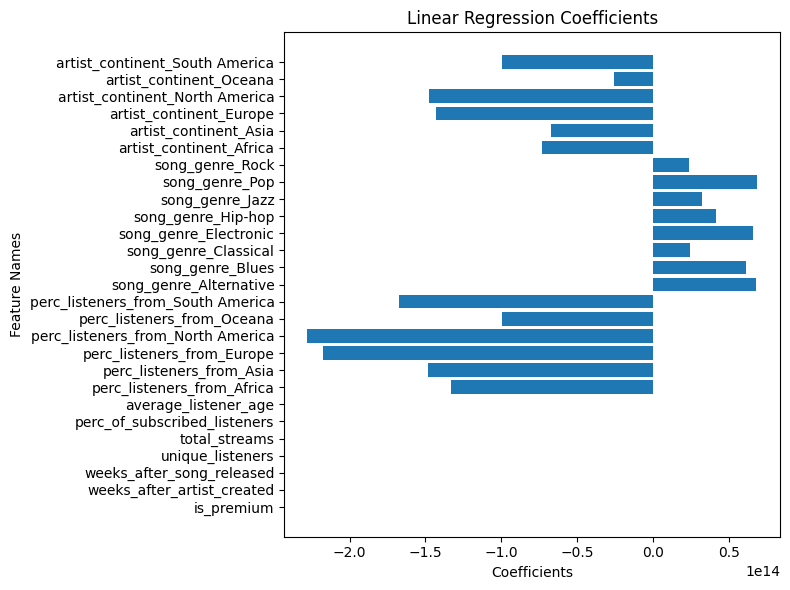

In [10]:
import matplotlib.pyplot as plt


# Get the coefficients and corresponding feature names
coefficients = model.coef_
feature_names = X.columns

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(feature_names, coefficients)

# Add labels and title
plt.xlabel('Coefficients')
plt.ylabel('Feature Names')
plt.title('Linear Regression Coefficients')

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
coefs_df = pd.DataFrame([feature_names, coefficients]).T
coefs_df.columns=['name', 'coef']
coefs_df = coefs_df.set_index('name')
coefs_df = coefs_df.sort_values('coef')

coefs_df

,coef
name,
perc_listeners_from_North America,-228248624132585.0
perc_listeners_from_Europe,-217708345811861.5
perc_listeners_from_South America,-167338639829893.25
perc_listeners_from_Asia,-148351749425776.8125
artist_continent_North America,-147749903716475.59375
artist_continent_Europe,-143131940783661.875
perc_listeners_from_Africa,-133416986379335.125
perc_listeners_from_Oceana,-99779976769945.28125
artist_continent_South America,-99509463841476.140625
